**Data Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import datetime as dt
import plotly.express as px

# Load data from Kaggle competition
train_df = pd.read_csv('/content/train.csv')
stores_df = pd.read_csv('/content/stores.csv')
oil_df = pd.read_csv('/content/oil.csv')
holidays_df = pd.read_csv('/content/holidays_events.csv')
transactions_df = pd.read_csv('/content/transactions.csv')

**Data Preprocessing**

In [ ]:
# 1. General overview and checking for missing values
print("Train Data Head:\n", train_df.head())
print("Train Data Missing Values:\n", train_df.isnull().sum())
print("Oil Data Missing Values:\n", oil_df.isnull().sum())

Train Data Head:
    id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
Train Data Missing Values:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
Oil Data Missing Values:
 date           0
dcoilwtico    43
dtype: int64


In [ ]:
# Merge Dataframes for a comprehensive dataset
data = train_df.merge(stores_df, on='store_nbr', how='left')
data = data.merge(oil_df, on='date', how='left')
data = data.merge(holidays_df, on='date', how='left')
data = data.merge(transactions_df, on=['date', 'store_nbr'], how='left')

In [ ]:
print("Data Missing Values:\n", data.isnull().sum())

Data Missing Values:
 id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
dcoilwtico       955152
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions     249117
dtype: int64


In [ ]:
# Display rows where 'transactions' has missing values
missing_transactions = data[data['transactions'].isnull()]
missing_transactions

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838523,2790409,2017-04-19,52,POULTRY,0.0,0,Manta,Manabi,A,11,50.49,NaN,NaN,NaN,NaN,NaN,NaN
2838524,2790410,2017-04-19,52,PREPARED FOODS,0.0,0,Manta,Manabi,A,11,50.49,NaN,NaN,NaN,NaN,NaN,NaN
2838525,2790411,2017-04-19,52,PRODUCE,0.0,0,Manta,Manabi,A,11,50.49,NaN,NaN,NaN,NaN,NaN,NaN
2838526,2790412,2017-04-19,52,SCHOOL AND OFFICE SUPPLIES,0.0,0,Manta,Manabi,A,11,50.49,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove the sale data before the store open
print(data.shape)
data = data[~((data.store_nbr == 52) & (data.date < "2017-04-20"))]
data = data[~((data.store_nbr == 22) & (data.date < "2015-10-09"))]
data = data[~((data.store_nbr == 42) & (data.date < "2015-08-21"))]
data = data[~((data.store_nbr == 21) & (data.date < "2015-07-24"))]
data = data[~((data.store_nbr == 29) & (data.date < "2015-03-20"))]
data = data[~((data.store_nbr == 20) & (data.date < "2015-02-13"))]
data = data[~((data.store_nbr == 53) & (data.date < "2014-05-29"))]
data = data[~((data.store_nbr == 36) & (data.date < "2013-05-09"))]
data = data[~((data.date < "2013-01-02"))]

# Drop rows where the 'transactions' column has missing values
data = data.dropna(subset=['transactions'])

data.shape

(3054348, 17)


(2805198, 17)

In [ ]:
data.head(20)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
1782,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1783,1783,2013-01-02,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1784,1784,2013-01-02,1,BEAUTY,2.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1785,1785,2013-01-02,1,BEVERAGES,1091.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1786,1786,2013-01-02,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1787,1787,2013-01-02,1,BREAD/BAKERY,470.652,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1788,1788,2013-01-02,1,CELEBRATION,0.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1789,1789,2013-01-02,1,CLEANING,1060.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1790,1790,2013-01-02,1,DAIRY,579.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0
1791,1791,2013-01-02,1,DELI,164.069,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN,NaN,NaN,2111.0


**Exploratory Data Analysis (EDA)**

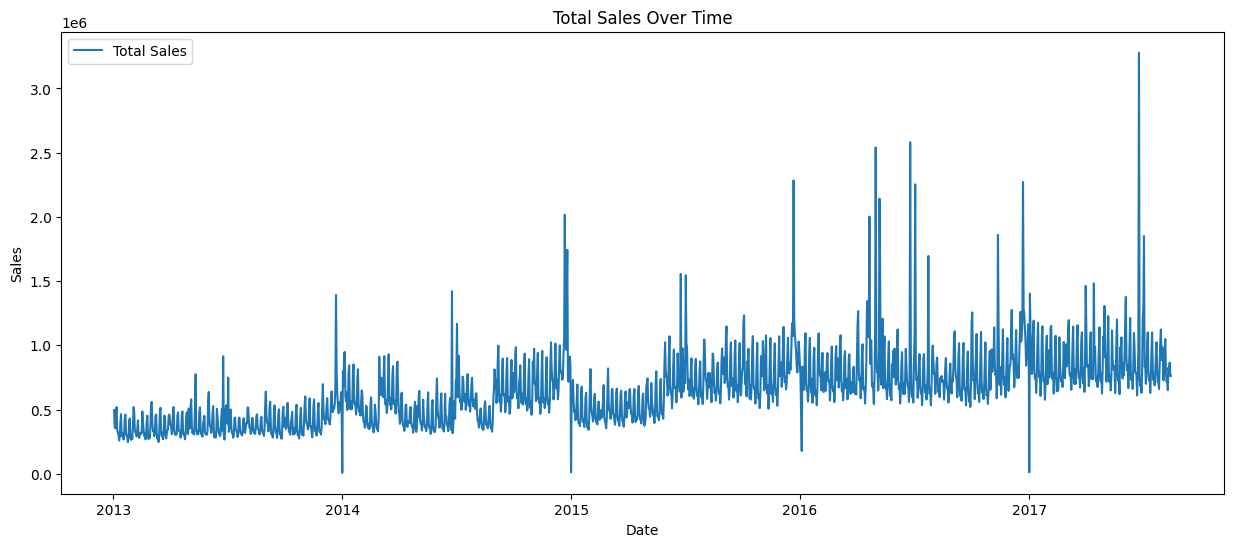

In [ ]:
# 1. Plotting basic statistics of the time series
# Sales over time
plt.figure(figsize=(15, 6))
# Group data by date to get total sales for each day
date_group = data.groupby('date')['sales'].sum().reset_index()
date_group['date'] = pd.to_datetime(date_group['date'])
plt.plot(date_group['date'], date_group['sales'], label='Total Sales')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

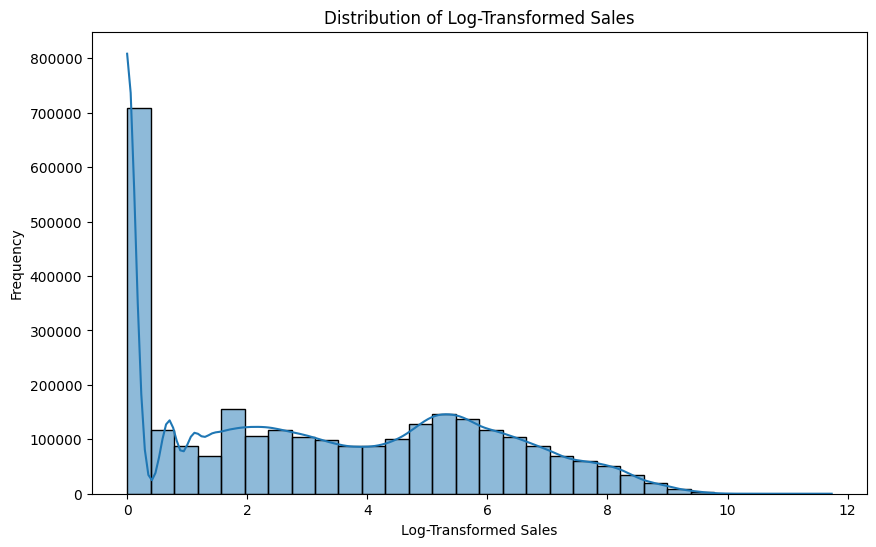

In [ ]:
#3. Distribution of Log-Transformed Sales
# Log transformation to reduce skewness
data['log_sales'] = np.log1p(data['sales'])

# Distribution and statistics of sales per store
plt.figure(figsize=(10, 6))
sns.histplot(data['log_sales'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Sales')
plt.xlabel('Log-Transformed Sales')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 4. Spearman Correlation between Total Sales and Transactions
# Merge total sales per day and store with transactions
temp = pd.merge(
    data.groupby(["date", "store_nbr"]).sales.sum().reset_index(name='total_sales'),
    data,
    on=["date", "store_nbr"],
    how="left"
)

# Convert the 'date' column to datetime (if not already)
temp['date'] = pd.to_datetime(temp['date'])
numeric_cols = temp.select_dtypes(include=['number'])

# Calculate the Spearman correlation between Total Sales and Transactions
spearman_corr = numeric_cols.corr("spearman").loc["total_sales", "transactions"]
print(f"Spearman Correlation between Total Sales and Transactions: {spearman_corr:.4f}")

# Plot transactions over time for each store using Plotly
fig = px.line(
    data.sort_values(["store_nbr", "date"]),
    x='date',
    y='transactions',
    color='store_nbr',
    title="Transactions Over Time by Store"
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 5. Monthly Average Transaction
# Ensure 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Resample transactions data by month to get the monthly average transactions
monthly_avg_transactions = data.set_index("date").resample("M")['transactions'].mean().reset_index()

# Extract the year from the date column
monthly_avg_transactions["year"] = monthly_avg_transactions["date"].dt.year

# Plot the monthly average transactions over time, color-coded by year
fig = px.line(
    monthly_avg_transactions,
    x='date',
    y='transactions',
    color='year',
    title="Monthly Average Transactions",
    width=1000,
    height=600
)
fig.show()

<ipython-input-71-fc4850640586>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# 6. Average Transactions by Day of the Week for Each Year
# Copy transactions data and ensure 'date' is in datetime format
a = data.copy()
a["date"] = pd.to_datetime(a["date"])

# Extract year and day of the week
a["year"] = a["date"].dt.year
a["dayofweek"] = a["date"].dt.dayofweek + 1  # Day of week with Monday as 1 and Sunday as 7

# Group by year and day of the week to calculate the average transactions
a = a.groupby(["year", "dayofweek"])["transactions"].mean().reset_index()

# Plot the average transactions by day of the week for each year
fig = px.line(
    a,
    x="dayofweek",
    y="transactions",
    color="year",
    title="Average Transactions by Day of the Week for Each Year",
    labels={"dayofweek": "Day of the Week", "transactions": "Average Transactions"},
    width=1000,
    height=600
)
fig.show()

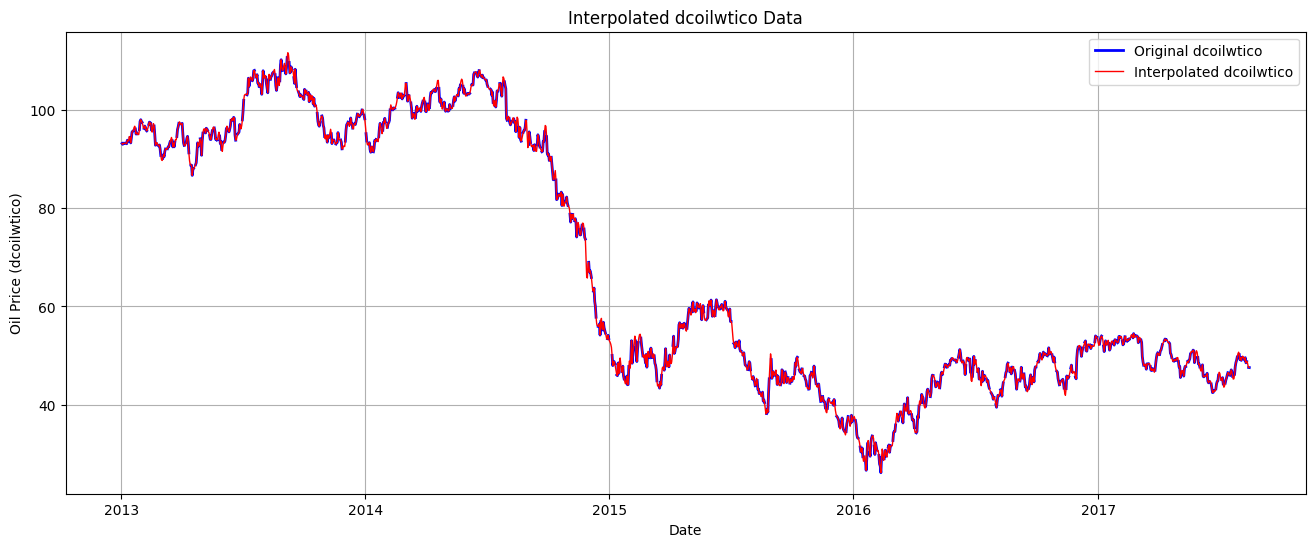

In [ ]:
# 7. Interpolation of missing data in Oil price
# Ensure 'date' is a column and not the index
if 'date' not in data.columns:
    data = data.reset_index()

# Step 1: Create a temporary DataFrame with unique dates for resampling
data_unique_dates = data.drop_duplicates(subset=["date"]).set_index("date")

# Step 2: Resample to ensure daily frequency, filling any date gaps with NaN
data_resampled = data_unique_dates.resample("D").asfreq()

# Step 3: Replace zeros with NaN in 'dcoilwtico' to prepare for interpolation
data_resampled["dcoilwtico"] = np.where(data_resampled["dcoilwtico"] == 0, np.nan, data_resampled["dcoilwtico"])

# Step 4: Interpolate missing values in 'dcoilwtico' using polynomial interpolation
data_resampled["dcoilwtico_interpolated"] = data_resampled["dcoilwtico"].interpolate(method='polynomial', order=2)

# Step 5: Merge the interpolated values back with the original DataFrame on 'date' to retain all rows
data = data.set_index("date").join(data_resampled[["dcoilwtico_interpolated"]], on="date").reset_index()

# Plot the original and interpolated 'dcoilwtico' values
plt.figure(figsize=(16, 6))
plt.plot(data['date'], data['dcoilwtico'], label='Original dcoilwtico', color='blue', linewidth=2)
plt.plot(data['date'], data['dcoilwtico_interpolated'], label='Interpolated dcoilwtico', color='red', linewidth=1)

# Adding title and labels
plt.title('Interpolated dcoilwtico Data')
plt.xlabel('Date')
plt.ylabel('Oil Price (dcoilwtico)')
plt.legend()
plt.grid(True)

# Display the chart
plt.show()

In [ ]:
# 8. Correlation between oil price with Sales and Transaction data
# Convert 'date' column to datetime in all relevant DataFrames
data['date'] = pd.to_datetime(data['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Aggregate sales per day
daily_sales = data.groupby("date")["sales"].sum().reset_index()

# Aggregate transactions per day
daily_transactions = data.groupby("date")["transactions"].sum().reset_index()

# Merge daily sales, daily transactions, and oil price data on 'date'
merged_data = daily_sales.merge(daily_transactions, on="date", how="left").merge(oil_df, on="date", how="left")

# Drop any rows with NaNs (if any) before calculating correlations
merged_data.dropna(inplace=True)

# Calculate and display the correlation matrix
correlation_matrix = merged_data[["sales", "transactions", "dcoilwtico"]].corr(method="spearman")
print("Spearman Correlation Matrix:")
print(correlation_matrix)

Spearman Correlation Matrix:
                 sales  transactions  dcoilwtico
sales         1.000000      0.771076   -0.641797
transactions  0.771076      1.000000   -0.406946
dcoilwtico   -0.641797     -0.406946    1.000000


In [ ]:
# 9. Correlation between holiday events with Sales and Transaction data
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a holiday indicator DataFrame with unique dates
holiday_data = data[['date']].drop_duplicates()
holiday_data['is_holiday'] = 1

# Generate a DataFrame with all dates within the date range
all_dates = pd.DataFrame(pd.date_range(start=data['date'].min(), end=data['date'].max()), columns=['date'])

# Merge all dates with holiday data and fill non-holidays with 0
holidays_full = all_dates.merge(holiday_data, on='date', how='left').fillna({'is_holiday': 0})

# Aggregate sales and transactions data from the main dataset
daily_sales = data.groupby("date")["sales"].sum().reset_index()
daily_transactions = data.groupby("date")["transactions"].sum().reset_index()

# Merge sales, transactions, and holiday indicator
merged_data = daily_sales.merge(daily_transactions, on="date", how="left").merge(holidays_full, on="date", how="left")

# Calculate the Spearman correlation between holiday events, sales, and transactions
correlation_matrix = merged_data[["sales", "transactions", "is_holiday"]].corr(method="spearman")
print("Spearman Correlation Matrix:")
print(correlation_matrix)

Spearman Correlation Matrix:
                 sales  transactions  is_holiday
sales         1.000000      0.744294         NaN
transactions  0.744294      1.000000         NaN
is_holiday         NaN           NaN         NaN


In [ ]:
# 10. Correlation between Pay day with Sales and Transaction Data
# Aggregate daily sales and transactions
daily_sales = data.groupby("date")["sales"].sum().reset_index()
daily_transactions = data.groupby("date")["transactions"].sum().reset_index()

# Merge sales and transactions data
merged_data = daily_sales.merge(daily_transactions, on="date", how="left")

# Create a 'payday' indicator for 15th and last day of each month
merged_data['day'] = merged_data['date'].dt.day
merged_data['month'] = merged_data['date'].dt.month
merged_data['year'] = merged_data['date'].dt.year

# Determine last day of each month
merged_data['last_day_of_month'] = pd.to_datetime(merged_data['year'].astype(str) + '-' +
                                                  merged_data['month'].astype(str) + '-1') \
                                                  + pd.offsets.MonthEnd(0)
merged_data['is_payday'] = ((merged_data['day'] == 15) | (merged_data['date'] == merged_data['last_day_of_month'])).astype(int)

# Calculate average sales and transactions for paydays vs. non-paydays
payday_averages = merged_data.groupby("is_payday")[["sales", "transactions"]].mean()
print("Average Sales and Transactions on Paydays vs. Non-Paydays:")
print(payday_averages)

# Calculate the Spearman correlation between payday indicator, sales, and transactions
correlation_matrix = merged_data[["sales", "transactions", "is_payday"]].corr(method="spearman")
print("\nSpearman Correlation Matrix:")
print(correlation_matrix)

Average Sales and Transactions on Paydays vs. Non-Paydays:
                   sales  transactions
is_payday                             
0          651266.232078  2.832280e+06
1          645965.894482  2.828580e+06

Spearman Correlation Matrix:
                 sales  transactions  is_payday
sales         1.000000      0.744294   0.009330
transactions  0.744294      1.000000   0.027032
is_payday     0.009330      0.027032   1.000000


In [ ]:
# 11. Correlation between Earthquake with Sales and Transaction Data
train_df['date'] = pd.to_datetime(train_df['date'])
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

# Aggregate sales per day
daily_sales = train_df.groupby("date")["sales"].sum().reset_index()

# Aggregate transactions per day
daily_transactions = transactions_df.groupby("date")["transactions"].sum().reset_index()

# Merge daily sales, daily transactions
merged_data = daily_sales.merge(daily_transactions, on="date", how="left")

# Create an earthquake indicator for the time period affected
merged_data['is_earthquake_period'] = ((merged_data['date'] >= '2016-04-16') & (merged_data['date'] <= '2016-05-31')).astype(int)

# Calculate the Spearman correlation between earthquake indicator, sales, and transactions
correlation_matrix = merged_data[["sales", "transactions", "is_earthquake_period"]].corr(method="spearman")
print("Spearman Correlation Matrix:")
print(correlation_matrix)

Spearman Correlation Matrix:
                         sales  transactions  is_earthquake_period
sales                 1.000000      0.733525              0.141704
transactions          0.733525      1.000000              0.056531
is_earthquake_period  0.141704      0.056531              1.000000


In [ ]:
# Drop unused columns
data.drop(['dcoilwtico'], axis=1, inplace=True)

In [ ]:
print("Data Missing Values:\n", data.isnull().sum())

Data Missing Values:
 date                             0
id                               0
store_nbr                        0
family                           0
sales                            0
onpromotion                      0
city                             0
state                            0
type_x                           0
cluster                          0
type_y                     2346168
locale                     2346168
locale_name                2346168
description                2346168
transferred                2346168
transactions                     0
log_sales                        0
dcoilwtico_interpolated          0
dtype: int64


**FEATURE ENGINEERING**

In [ ]:
# 1. Date Features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
# Rename due to duplication
data.rename(columns={'type_x': 'store_type', 'type_y': 'event_type'}, inplace=True)

In [ ]:
print(data.columns)

Index(['date', 'id', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'store_type', 'cluster', 'event_type', 'locale', 'locale_name',
       'description', 'transferred', 'transactions', 'log_sales',
       'dcoilwtico_interpolated', 'year', 'month', 'day', 'day_of_week',
       'is_weekend'],
      dtype='object')


In [ ]:
# 2. Holiday Features - Binary encoding for holidays
data['is_holiday'] = data['event_type'].apply(lambda x: 1 if x else 0)

# 3. Encoding
# 3.1 Store Type
le = LabelEncoder()
data['store_type_encoded'] = le.fit_transform(data['store_type'])
# 3.2 City
le = LabelEncoder()
data['city_encoded'] = le.fit_transform(data['city'])
# 3.3 State
le = LabelEncoder()
data['state_encoded'] = le.fit_transform(data['state'])
# 3.4 Family
le = LabelEncoder()
data['family_encoded'] = le.fit_transform(data['family'])

# 4. Oil Price - Log Transformation to reduce skewness
data['oil_price_log'] = np.log1p(data['dcoilwtico_interpolated'])

# 5. Scaling Features for Model Input
scaler = MinMaxScaler()
data[['transactions', 'oil_price_log']] = scaler.fit_transform(data[['transactions', 'oil_price_log']])

# 6. Lag Features for Time Series Analysis
# Create lag features for sales to capture temporal dependencies
data['sales_lag_1'] = data['sales'].shift(1)
data['sales_lag_7'] = data['sales'].shift(7)
data['sales_lag_30'] = data['sales'].shift(30)

# 7. Rolling Window Features
# Rolling mean and standard deviation to capture trends and seasonality
data['rolling_mean_7'] = data['sales'].rolling(window=7).mean()
data['rolling_std_7'] = data['sales'].rolling(window=7).std()
data['rolling_mean_30'] = data['sales'].rolling(window=30).mean()
data['rolling_std_30'] = data['sales'].rolling(window=30).std()

# 8. Interaction Features
# Interaction between store type and holiday
data['store_holiday_interaction'] = data['store_type_encoded'] * data['is_holiday']

# 9. Seasonality Features
# Adding seasonality by encoding month as categorical variable
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

In [ ]:
print("Data Missing Values:\n", data.isnull().sum())

Data Missing Values:
 date                               0
id                                 0
store_nbr                          0
family                             0
sales                              0
onpromotion                        0
city                               0
state                              0
store_type                         0
cluster                            0
event_type                   2346168
locale                       2346168
locale_name                  2346168
description                  2346168
transferred                  2346168
transactions                       0
log_sales                          0
dcoilwtico_interpolated            0
year                               0
month                              0
day                                0
day_of_week                        0
is_weekend                         0
is_holiday                         0
store_type_encoded                 0
city_encoded                       0
state_encoded   

In [ ]:
# Forward-fill or backfill missing values in lag and rolling features
data[['sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'rolling_mean_7', 'rolling_std_7',
      'rolling_mean_30', 'rolling_std_30']] = data[['sales_lag_1', 'sales_lag_7', 'sales_lag_30',
                                                    'rolling_mean_7', 'rolling_std_7',
                                                    'rolling_mean_30', 'rolling_std_30']].fillna(method='ffill').fillna(method='bfill')

# Displaying the missing values count to confirm filling
missing_values_filled = data[['sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'rolling_mean_7', 'rolling_std_7',
                              'rolling_mean_30', 'rolling_std_30']].isnull().sum()
missing_values_filled

<ipython-input-85-f653f86ce422>:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,0
sales_lag_1,0
sales_lag_7,0
sales_lag_30,0
rolling_mean_7,0
rolling_std_7,0
rolling_mean_30,0
rolling_std_30,0


In [ ]:
# Drop unused columns
data.drop(['store_type','event_type','locale','locale_name','description','transferred','city','state','family'], axis=1, inplace=True)

# Drop rows with empty data
data = data.dropna(axis=0, how='any')

In [ ]:
print("Data Missing Values:\n", data.isnull().sum())

Data Missing Values:
 date                         0
id                           0
store_nbr                    0
sales                        0
onpromotion                  0
cluster                      0
transactions                 0
log_sales                    0
dcoilwtico_interpolated      0
year                         0
month                        0
day                          0
day_of_week                  0
is_weekend                   0
is_holiday                   0
store_type_encoded           0
city_encoded                 0
state_encoded                0
family_encoded               0
oil_price_log                0
sales_lag_1                  0
sales_lag_7                  0
sales_lag_30                 0
rolling_mean_7               0
rolling_std_7                0
rolling_mean_30              0
rolling_std_30               0
store_holiday_interaction    0
month_sin                    0
month_cos                    0
dtype: int64


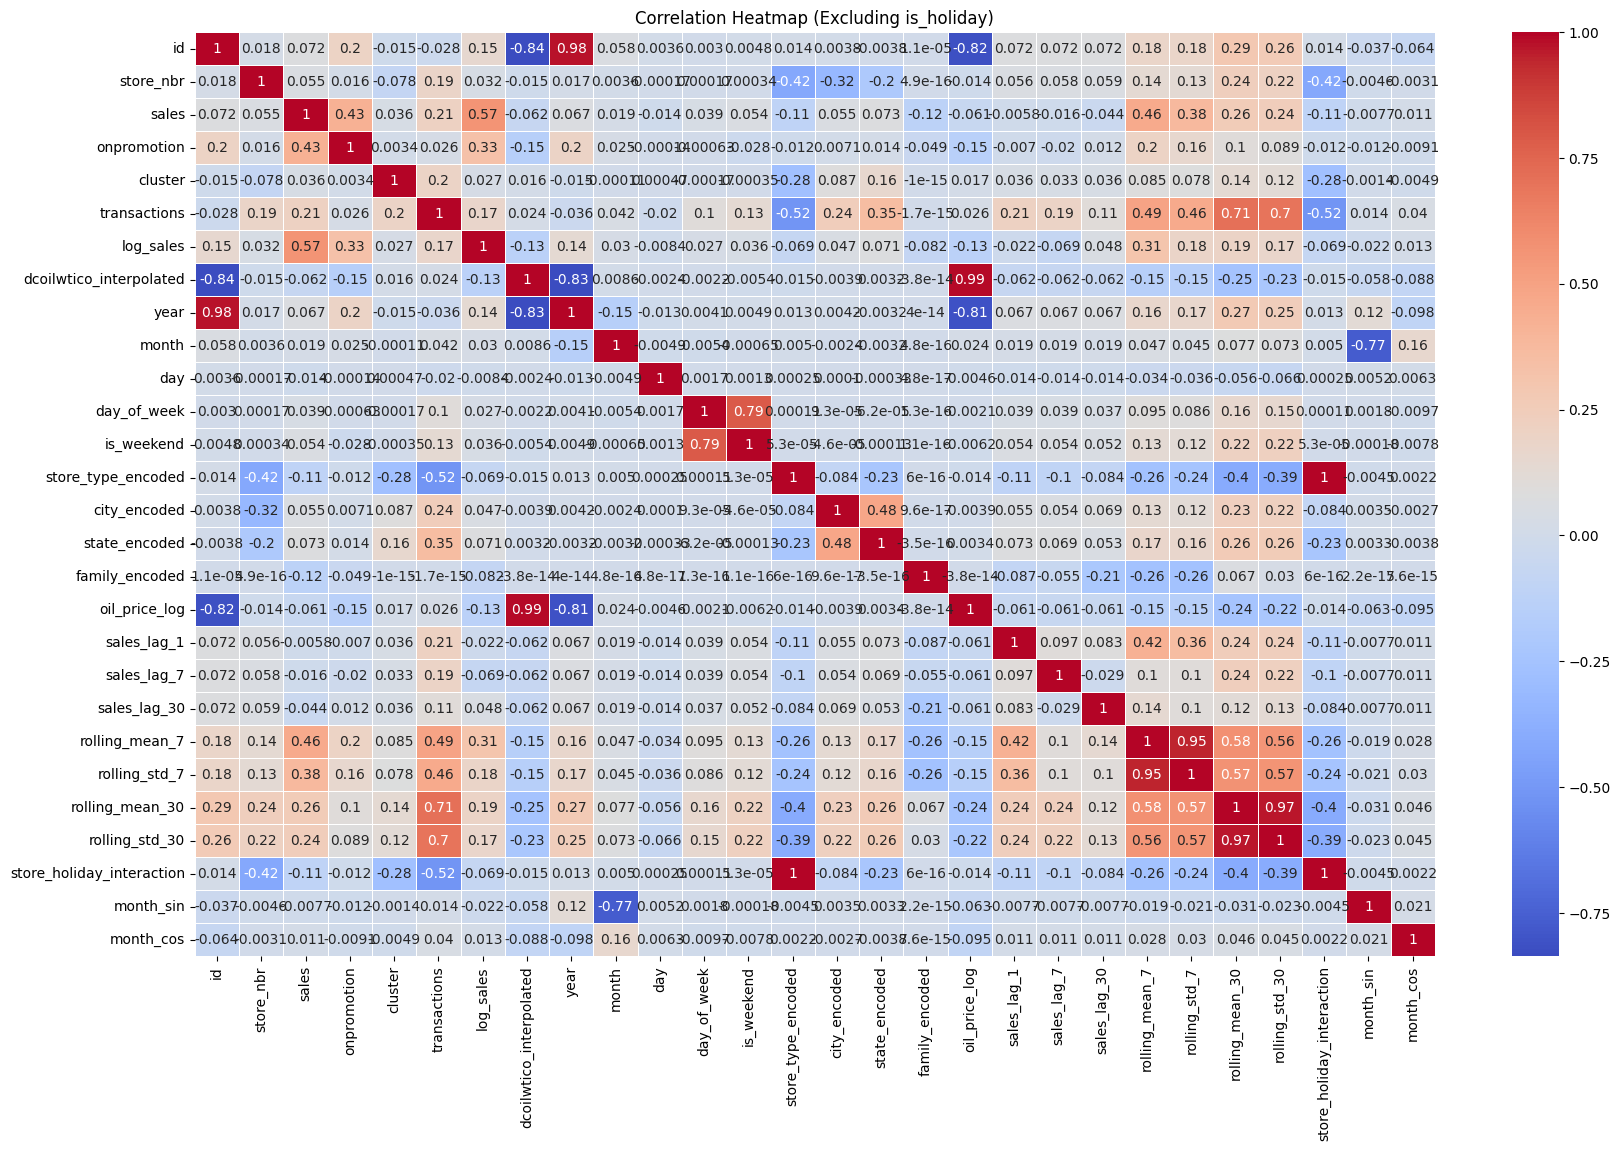

In [ ]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Drop 'is_holiday' column from the data before calculating correlation
numerical_data_excluding_holiday = numerical_data.drop(columns=['is_holiday'])

# Plot correlations to understand relationships
plt.figure(figsize=(20, 12))
sns.heatmap(numerical_data_excluding_holiday.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Excluding is_holiday)')
plt.show()

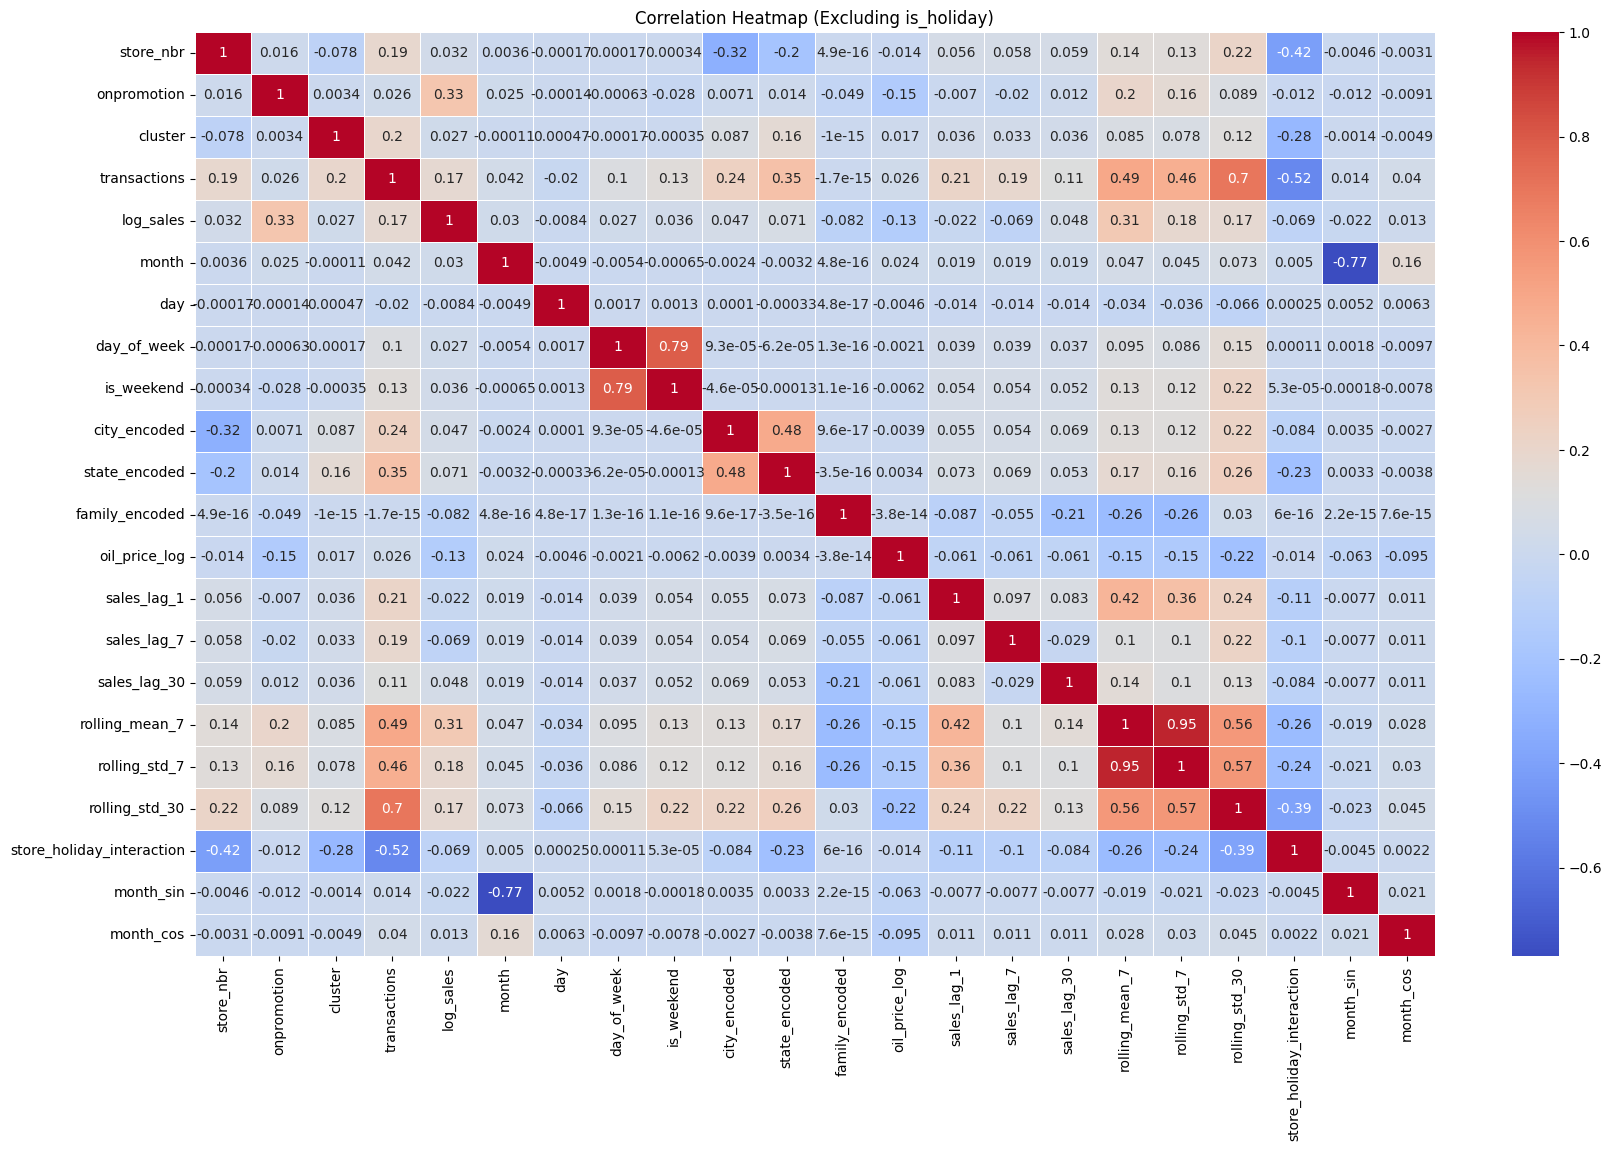

In [ ]:
# Drop columns to avoid potential multicollinearity
data.drop(['dcoilwtico_interpolated', 'store_type_encoded', 'id', 'year', 'rolling_mean_30', 'sales'], axis=1, inplace=True)

# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Drop 'is_holiday' column from the data before calculating correlation
numerical_data_excluding_holiday = numerical_data.drop(columns=['is_holiday'])

# Plot correlations to understand relationships
plt.figure(figsize=(20, 12))
sns.heatmap(numerical_data_excluding_holiday.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Excluding is_holiday)')
plt.show()

In [ ]:
data.head(20)

,date,store_nbr,onpromotion,cluster,transactions,log_sales,month,day,day_of_week,is_weekend,...,oil_price_log,sales_lag_1,sales_lag_7,sales_lag_30,rolling_mean_7,rolling_std_7,rolling_std_30,store_holiday_interaction,month_sin,month_cos
0,2013-01-02,1,0,13,0.252095,1.098612,1,2,2,0,...,0.874015,2.000,2.000,2.0,223.664571,420.638685,539.3566,3,0.5,0.866025
1,2013-01-02,1,0,13,0.252095,0.000000,1,2,2,0,...,0.874015,2.000,2.000,2.0,223.664571,420.638685,539.3566,3,0.5,0.866025
2,2013-01-02,1,0,13,0.252095,1.098612,1,2,2,0,...,0.874015,0.000,2.000,2.0,223.664571,420.638685,539.3566,3,0.5,0.866025
3,2013-01-02,1,0,13,0.252095,6.995766,1,2,2,0,...,0.874015,2.000,2.000,2.0,223.664571,420.638685,539.3566,3,0.5,0.866025
4,2013-01-02,1,0,13,0.252095,0.000000,1,2,2,0,...,0.874015,1091.000,2.000,2.0,223.664571,420.638685,539.3566,3,0.5,0.866025
5,2013-01-02,1,0,13,0.252095,6.156241,1,2,2,0,...,0.874015,0.000,2.000,2.0,223.664571,420.638685,539.3566,3,0.5,0.866025
6,2013-01-02,1,0,13,0.252095,0.000000,1,2,2,0,...,0.874015,470.652,2.000,2.0,223.664571,420.638685,539.3566,3,0.5,0.866025
7,2013-01-02,1,0,13,0.252095,6.966967,1,2,2,0,...,0.874015,0.000,2.000,2.0,374.807429,508.598408,539.3566,3,0.5,0.866025
8,2013-01-02,1,0,13,0.252095,6.363028,1,2,2,0,...,0.874015,1060.000,0.000,2.0,457.521714,483.969089,539.3566,3,0.5,0.866025
9,2013-01-02,1,0,13,0.252095,5.106364,1,2,2,0,...,0.874015,579.000,2.000,2.0,480.674429,461.919654,539.3566,3,0.5,0.866025


In [ ]:
# Final Dataset Overview
print("Data Types:\n", data.dtypes)
print("Final Dataset Head:\n", data.head())

Data Types:
 date                         datetime64[ns]
store_nbr                             int64
onpromotion                           int64
cluster                               int64
transactions                        float64
log_sales                           float64
month                                 int32
day                                   int32
day_of_week                           int32
is_weekend                            int64
is_holiday                            int64
city_encoded                          int64
state_encoded                         int64
family_encoded                        int64
oil_price_log                       float64
sales_lag_1                         float64
sales_lag_7                         float64
sales_lag_30                        float64
rolling_mean_7                      float64
rolling_std_7                       float64
rolling_std_30                      float64
store_holiday_interaction             int64
month_sin          

**Dataset with and Without the External Factors**

In [ ]:
# Preparing the Datasets: With and Without the External Factors
from sklearn.model_selection import train_test_split

# Define external factors
external_factors = ['is_holiday', 'oil_price_log', 'store_holiday_interaction']

# Sample 35% of the dataset to reduce training time
sample_fraction = 0.35
data_sampled = data.sample(frac=sample_fraction, random_state=42)

# Dataset with external factors
X_with_external = data_sampled.drop(columns=['log_sales', 'date'])
y = data_sampled['log_sales']

# Dataset without external factors
X_without_external = X_with_external.drop(columns=external_factors)

# Split data into train, validation, and test sets for datasets with external factors
X_train_with, X_temp_with, y_train_with, y_temp_with = train_test_split(
    X_with_external, y, test_size=0.3, random_state=42)
X_val_with, X_test_with, y_val_with, y_test_with = train_test_split(
    X_temp_with, y_temp_with, test_size=0.5, random_state=42)

# Split data into train, validation, and test sets for datasets without external factors
X_train_without, X_temp_without, y_train_without, y_temp_without = train_test_split(
    X_without_external, y, test_size=0.3, random_state=42)
X_val_without, X_test_without, y_val_without, y_test_without = train_test_split(
    X_temp_without, y_temp_without, test_size=0.5, random_state=42)

# Calculate and print data split ratios
total_samples = len(data_sampled)
train_samples = len(y_train_with)
val_samples = len(y_val_with)
test_samples = len(y_test_with)

train_ratio = train_samples / total_samples
val_ratio = val_samples / total_samples
test_ratio = test_samples / total_samples

print(f"Total samples: {total_samples}")
print(f"Training samples: {train_samples} ({train_ratio * 100:.2f}%)")
print(f"Validation samples: {val_samples} ({val_ratio * 100:.2f}%)")
print(f"Test samples: {test_samples} ({test_ratio * 100:.2f}%)")

Total samples: 981819
Training samples: 687273 (70.00%)
Validation samples: 147273 (15.00%)
Test samples: 147273 (15.00%)


In [ ]:
# Summary of X_train with external factors
print("Summary of X_train with external factors:")
print(X_train_with.describe())

# Summary of X_train without external factors
print("\nSummary of X_train without external factors:")
print(X_train_without.describe())

# Summary statistics for y_train
print("\nSummary statistics for y_train (target variable):")
print(y_train_with.describe())

# Summary statistics for y_train
print("\nSummary statistics for y_train (target variable):")
print(y_train_without.describe())

Summary of X_train with external factors:
           store_nbr    onpromotion        cluster   transactions  \
count  687273.000000  687273.000000  687273.000000  687273.000000   
mean       26.927546       2.840788       8.528355       0.202544   
std        15.608360      12.672205       4.725532       0.115647   
min         1.000000       0.000000       1.000000       0.000000   
25%        13.000000       0.000000       4.000000       0.124731   
50%        27.000000       0.000000       9.000000       0.166507   
75%        40.000000       0.000000      13.000000       0.248264   
max        54.000000     741.000000      17.000000       1.000000   

               month            day    day_of_week     is_weekend  is_holiday  \
count  687273.000000  687273.000000  687273.000000  687273.000000    687273.0   
mean        6.260234      15.729431       3.009340       0.287884         1.0   
std         3.362613       8.778340       2.001433       0.452777         0.0   
min         

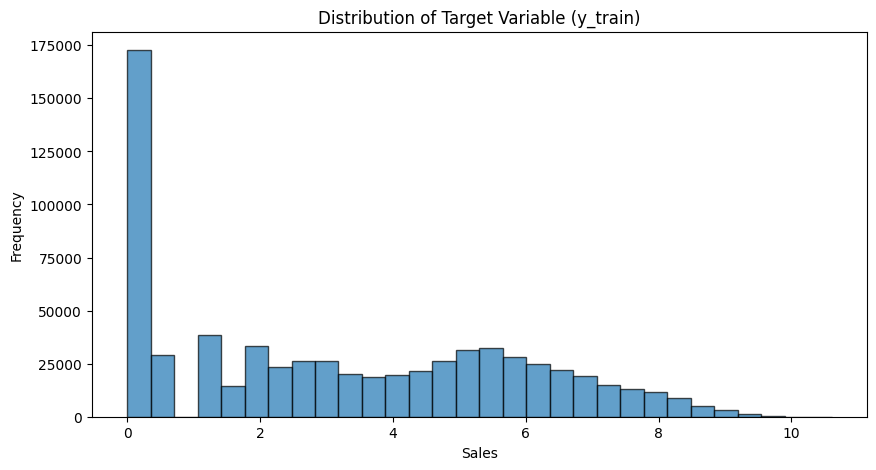

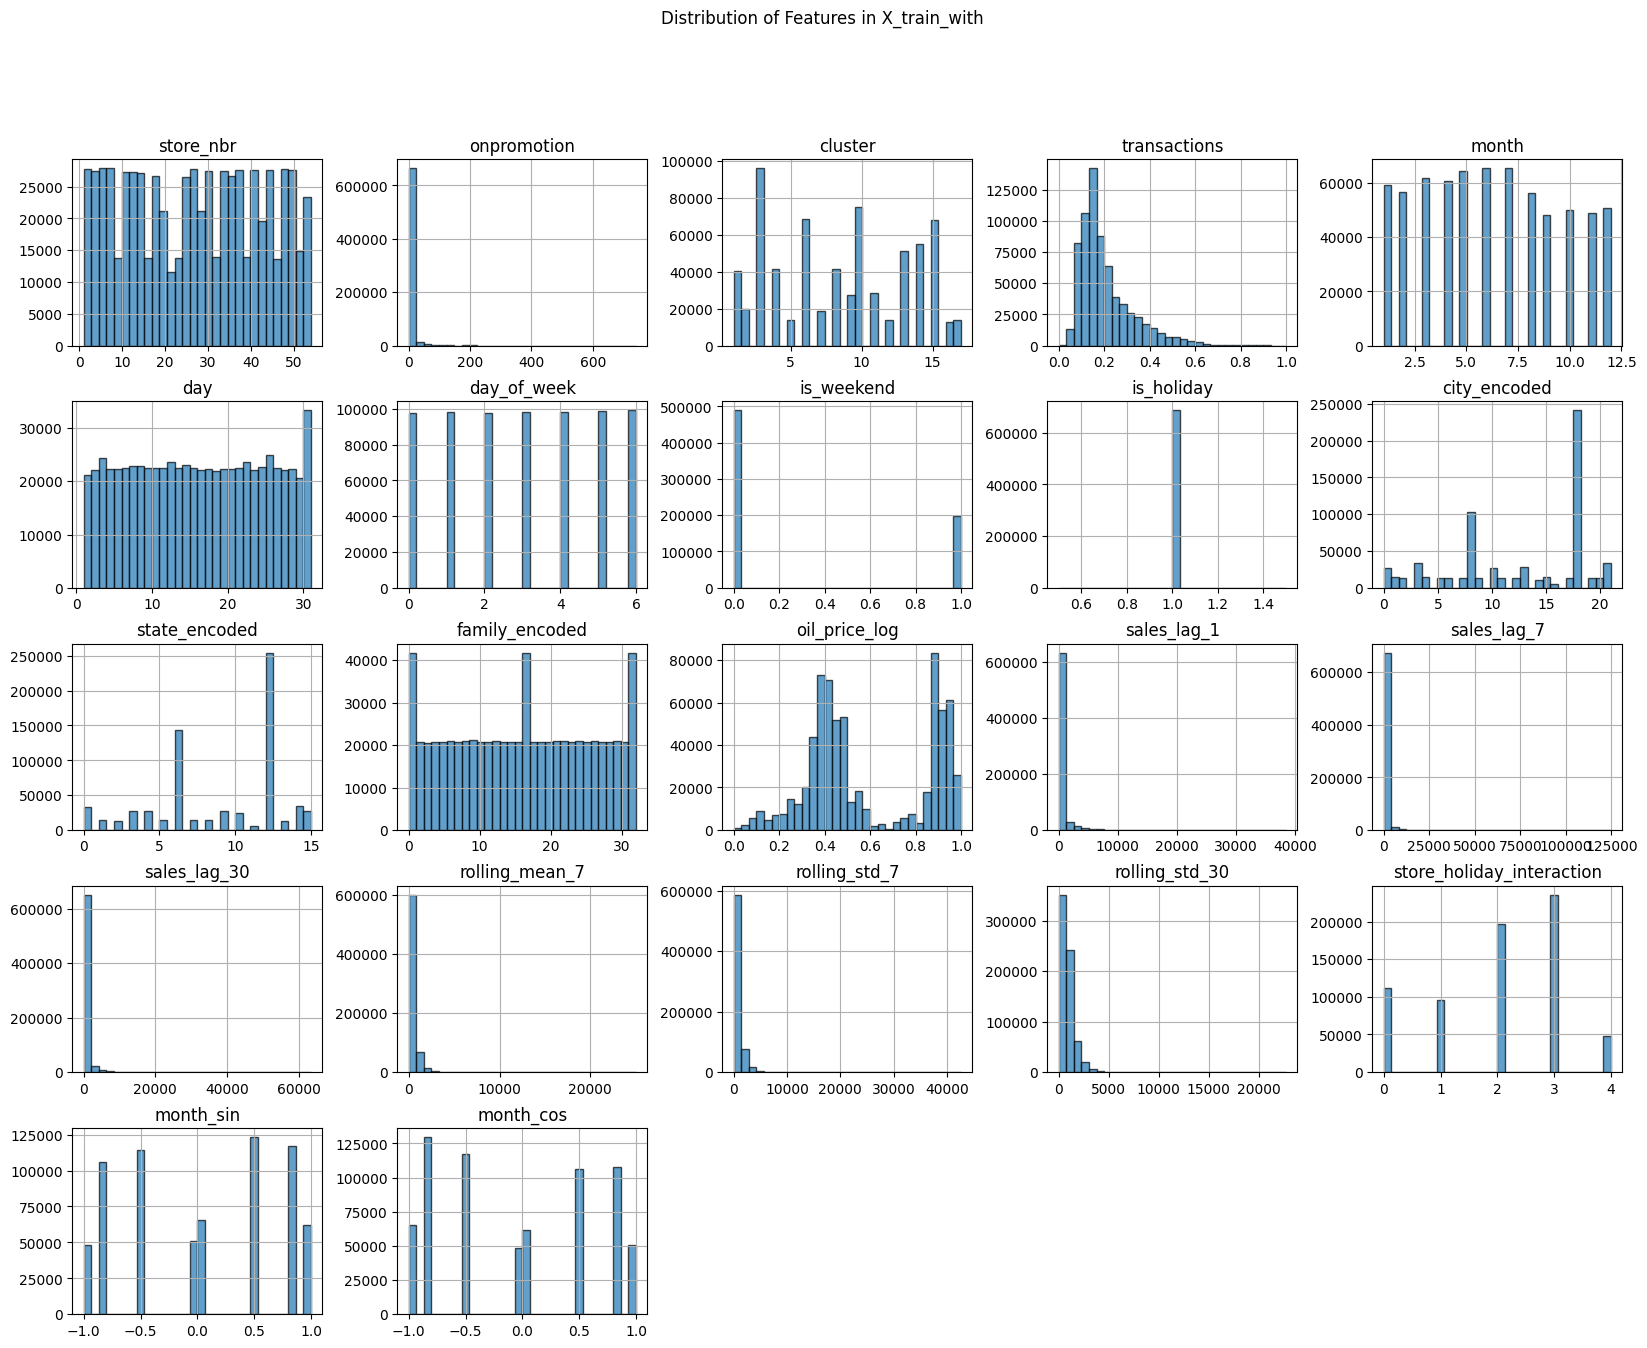

In [ ]:
# Histogram of y_train
plt.figure(figsize=(10, 5))
plt.hist(y_train_with, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Target Variable (y_train)")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Histograms of features in X_train_with (optional)
X_train_with.hist(bins=30, figsize=(20, 15), edgecolor='k', alpha=0.7)
plt.suptitle("Distribution of Features in X_train_with")
plt.show()

**Machine Learning Model Training**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define RMSLE function
def rmsle(y_true, y_pred):
    # Clip predictions and true values to ensure non-negativity
    y_pred = np.maximum(0, y_pred)
    y_true = np.maximum(0, y_true)
    # Compute RMSLE
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Define function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Calculate training time in minutes
    training_time_minutes = (time.time() - start_time) / 60.0

    # Make predictions on validation set
    y_pred_val = model.predict(X_val)
    # Ensure non-negative predictions
    y_pred_val = np.maximum(0, y_pred_val)
    # Compute RMSLE on validation set
    rmsle_val = rmsle(y_val, y_pred_val)

    # Make predictions on test set
    y_pred_test = model.predict(X_test)
    # Ensure non-negative predictions
    y_pred_test = np.maximum(0, y_pred_test)
    # Compute metrics on test set
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmsle_test = rmsle(y_test, y_pred_test)

    return mae, rmse, rmsle_test, rmsle_val, training_time_minutes

In [ ]:
# Initialize models with default parameters
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# List to store results
results = []

# Random Forest
print("Training Random Forest...")
mae_rf, rmse_rf, rmsle_test_rf, rmsle_val_rf, training_time_rf = train_and_evaluate_model(
    rf_model, X_train_without, y_train_without, X_val_without, y_val_without, X_test_without, y_test_without)
results.append(['Random Forest', mae_rf, rmse_rf, rmsle_test_rf, rmsle_val_rf, training_time_rf])

# XGBoost
print("Training XGBoost...")
mae_xgb, rmse_xgb, rmsle_test_xgb, rmsle_val_xgb, training_time_xgb = train_and_evaluate_model(
    xgb_model, X_train_without, y_train_without, X_val_without, y_val_without, X_test_without, y_test_without)
results.append(['XGBoost', mae_xgb, rmse_xgb, rmsle_test_xgb, rmsle_val_xgb, training_time_xgb])

# Gradient Boosting
print("Training Gradient Boosting...")
mae_gb, rmse_gb, rmsle_test_gb, rmsle_val_gb, training_time_gb = train_and_evaluate_model(
    gb_model, X_train_without, y_train_without, X_val_without, y_val_without, X_test_without, y_test_without)
results.append(['Gradient Boosting', mae_gb, rmse_gb, rmsle_test_gb, rmsle_val_gb, training_time_gb])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=[
    'Model', 'MAE', 'RMSE', 'RMSLE (Test)', 'RMSLE (Validation)', 'Training Time (minutes)'
])

# Display results
print("\nMachine Learning Model Performance Comparison:")
print(df_results)

Training Random Forest...
Training XGBoost...
Training Gradient Boosting...

Model Performance Comparison:
               Model       MAE      RMSE  RMSLE (Test)  RMSLE (Validation)  \
0      Random Forest  0.255571  0.443294      0.199664            0.199116   
1            XGBoost  0.403407  0.601080      0.259672            0.257577   
2  Gradient Boosting  0.823487  1.074717      0.423972            0.422187   

   Training Time (minutes)  
0                17.167357  
1                 0.016518  
2                 4.186934  


In [ ]:
# import time
# from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error
# import numpy as np

# # RMSLE metric
# def rmsle(y_true, y_pred):
#     return np.sqrt(mean_squared_log_error(y_true, y_pred))

# # Zero Forecasting Adjustment
# def apply_zero_forecasting(y_true, y_pred):
#     if (y_true[-14:] == 0).all():  # Last 14 days are zeros
#         return np.zeros_like(y_pred)  # Set all predictions to zero
#     return y_pred

# # Custom RMSLE calculation function that ensures non-negative values
# def rmsle(y_true, y_pred):
#     # Clip predictions to avoid negative values
#     y_pred = np.maximum(0, y_pred)
#     y_true = np.maximum(0, y_true)
#     return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# # Updated evaluation function with clipping on predictions
# def train_and_evaluate_ml_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
#     start_time = time.time()

#     # Train the model
#     model.fit(X_train, y_train)

#     # Calculate time taken in minutes
#     elapsed_time_minutes = (time.time() - start_time) / 60

#     # Make predictions on validation set and clip to ensure non-negativity
#     y_pred_val = model.predict(X_val)
#     y_pred_val = np.maximum(0, y_pred_val)

#     # RMSLE on validation set
#     rmsle_val = rmsle(y_val, y_pred_val)

#     # Make predictions on test set and clip to ensure non-negativity
#     y_pred_test = model.predict(X_test)
#     y_pred_test = np.maximum(0, y_pred_test)

#     # Calculate other metrics on the test set
#     mae = mean_absolute_error(y_test, y_pred_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     rmsle_test = rmsle(y_test, y_pred_test)

#     return mae, rmse, rmsle_test, rmsle_val, elapsed_time_minutes

In [ ]:
# !pip install xgboost==2.1.1

In [ ]:
# # Import necessary models
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor

# # Increase complexity of models
# models = {
#     'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42),
#     'XGBoost': XGBRegressor(n_estimators=200, max_depth=15, random_state=42, learning_rate=0.05),
#     'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=8, random_state=42)
# }

# # Prepare lists to store results
# results_with = []
# results_without = []

# # # Train and evaluate each model on dataset with external factors
# # print("\nEvaluating Machine Learning models on dataset with external factors...")
# # for model_name, model in models.items():
# #     mae, rmse, rmsle_test, rmsle_val, elapsed_time = train_and_evaluate_ml_model(
# #         model, X_train_with, y_train, X_val_with, y_val, X_test_with, y_test)
# #     results_with.append([model_name, mae, rmse, rmsle_test, rmsle_val, elapsed_time])

# # Train and evaluate each model on dataset without external factors
# print("\nEvaluating Machine Learning models on dataset without external factors...")
# for model_name, model in models.items():
#     mae, rmse, rmsle_test, rmsle_val, elapsed_time = train_and_evaluate_ml_model(
#         model, X_train_without, y_train, X_val_without, y_val, X_test_without, y_test)
#     results_without.append([model_name, mae, rmse, rmsle_test, rmsle_val, elapsed_time])

# # Convert results to DataFrames for easy comparison
# # df_results_with = pd.DataFrame(results_with, columns=['Model', 'MAE', 'RMSE', 'RMSLE (Test)', 'RMSLE (Validation)', 'Training Time (minutes)'])
# df_results_without = pd.DataFrame(results_without, columns=['Model', 'MAE', 'RMSE', 'RMSLE (Test)', 'RMSLE (Validation)', 'Training Time (minutes)'])

# # print("\nMachine Learning Model Performance with External Factors:")
# # print(df_results_with)

# print("\nMachine Learning Model Performance without External Factors:")
# print(df_results_without)

**Deep Learning Models Training**

In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import time
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import LSTM, Conv1D, Dense, Dropout, MultiHeadAttention, Flatten, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# import gc

# # Enable mixed precision to optimize memory usage
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')

# # Convert y_train, y_val, y_test to NumPy arrays
# y_train = np.array(y_train)
# y_val = np.array(y_val)
# y_test = np.array(y_test)

# # Scale the features
# scaler = MinMaxScaler()
# X_train_with_scaled = scaler.fit_transform(X_train_with)
# X_val_with_scaled = scaler.transform(X_val_with)
# X_test_with_scaled = scaler.transform(X_test_with)

# X_train_without_scaled = scaler.fit_transform(X_train_without)
# X_val_without_scaled = scaler.transform(X_val_without)
# X_test_without_scaled = scaler.transform(X_test_without)

# # Define Timeseries Generators
# n_steps = 5  # Number of time steps
# batch_size = 8  # Small batch size to optimize memory usage

# # Timeseries Generators for training, validation, and testing
# train_generator = TimeseriesGenerator(X_train_without_scaled, y_train, length=n_steps, batch_size=batch_size)
# val_generator = TimeseriesGenerator(X_val_without_scaled, y_val, length=n_steps, batch_size=batch_size)
# test_generator = TimeseriesGenerator(X_test_without_scaled, y_test, length=n_steps, batch_size=batch_size)

# # Learning rate scheduler to reduce learning rate on plateau
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

In [ ]:
# # Step 2: Define Deep Learning Models with higher complexity
# # LSTM Model
# def build_lstm_model(input_shape):
#     model = Sequential([
#         LSTM(100, activation='relu', return_sequences=True, input_shape=input_shape),
#         Dropout(0.2),
#         LSTM(50, activation='relu', return_sequences=True),
#         Dropout(0.2),
#         LSTM(25, activation='relu'),
#         Dense(1)
#     ])
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
#     return model

In [ ]:
# # CNN Model
# def build_cnn_model(input_shape):
#     model = Sequential([
#         Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape),
#         Conv1D(filters=64, kernel_size=3, activation='relu'),
#         Dropout(0.2),
#         Flatten(),
#         Dense(1)
#     ])
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
#     return model

In [ ]:
# # Transformer Model
# def build_transformer_model(input_shape):
#     inputs = Input(shape=input_shape)
#     attention_output = MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
#     flattened = Flatten()(attention_output)
#     outputs = Dense(1)(flattened)
#     model = Model(inputs=inputs, outputs=outputs)
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
#     return model

In [ ]:
# # Step 3: Define Metrics
# # Function to calculate RMSLE
# def rmsle(y_true, y_pred):
#     y_true = np.maximum(0, y_true)
#     y_pred = np.maximum(0, y_pred)
#     # To avoid log(0), we add 1 to the values
#     return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# def train_and_evaluate_dl_model(model, train_generator, val_generator, test_generator, epochs=10):
#     start_time = time.time()
#     history = model.fit(train_generator, epochs=epochs, validation_data=val_generator,
#                         callbacks=[lr_scheduler], verbose=1)
#     elapsed_time_minutes = (time.time() - start_time) / 60

#     # Make predictions on test set
#     y_pred_test = model.predict(test_generator).flatten()

#     # Extract y_true_test from the test_generator
#     y_true_test = []
#     for i in range(len(test_generator)):
#         _, y_batch = test_generator[i]
#         y_true_test.extend(y_batch)
#     y_true_test = np.array(y_true_test).flatten()

#     # Clip predictions to ensure non-negativity
#     y_pred_test = np.maximum(0, y_pred_test)

#     # Ensure lengths match for test data
#     print("Test data - Length of y_true_test:", len(y_true_test))
#     print("Test data - Length of y_pred_test:", len(y_pred_test))

#     if len(y_true_test) != len(y_pred_test):
#         print("Error: Lengths of y_true_test and y_pred_test do not match.")
#         return None, None, None, None, None

#     # Apply zero forecasting on test data
#     for i in range(n_steps, len(y_pred_test)):
#         if np.all(y_true_test[i - n_steps:i] == 0):
#             y_pred_test[i] = 0

#     # Make predictions on validation set
#     y_pred_val = model.predict(val_generator).flatten()

#     # Extract y_true_val from the val_generator
#     y_true_val = []
#     for i in range(len(val_generator)):
#         _, y_batch = val_generator[i]
#         y_true_val.extend(y_batch)
#     y_true_val = np.array(y_true_val).flatten()

#     # Clip predictions to ensure non-negativity
#     y_pred_val = np.maximum(0, y_pred_val)

#     # Ensure lengths match for validation data
#     print("Validation data - Length of y_true_val:", len(y_true_val))
#     print("Validation data - Length of y_pred_val:", len(y_pred_val))

#     if len(y_true_val) != len(y_pred_val):
#         print("Error: Lengths of y_true_val and y_pred_val do not match.")
#         rmsle_val = None
#     else:
#         # Apply zero forecasting on validation data
#         for i in range(n_steps, len(y_pred_val)):
#             if np.all(y_true_val[i - n_steps:i] == 0):
#                 y_pred_val[i] = 0

#         try:
#             rmsle_val = rmsle(y_true_val, y_pred_val)
#         except Exception as e:
#             print("Error calculating RMSLE (Validation):", e)
#             rmsle_val = None

#     # Calculate metrics on test data
#     try:
#         mae = mean_absolute_error(y_true_test, y_pred_test)
#     except Exception as e:
#         print("Error calculating MAE:", e)
#         mae = None

#     try:
#         rmse = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
#     except Exception as e:
#         print("Error calculating RMSE:", e)
#         rmse = None

#     try:
#         rmsle_test = rmsle(y_true_test, y_pred_test)
#     except Exception as e:
#         print("Error calculating RMSLE (Test):", e)
#         rmsle_test = None

#     return mae, rmse, rmsle_test, rmsle_val, elapsed_time_minutes

In [ ]:
# # Step 4: Train and Evaluate Models
# # Define input shape for each model with increased complexity
# input_shape = (n_steps, X_train_without_scaled.shape[1])

# # Train models one by one, saving results and clearing memory after each
# models = {
#     'LSTM': build_lstm_model(input_shape),
#     'CNN': build_cnn_model(input_shape),
#     'Transformer': build_transformer_model(input_shape)
# }

# results = []
# for model_name, model in models.items():
#     print(f"\nTraining {model_name} model...")

#     # Train and evaluate with RMSLE (Validation)
#     mae, rmse, rmsle_test, rmsle_val, elapsed_time = train_and_evaluate_dl_model(
#         model, train_generator, val_generator, test_generator, epochs=10)

#     if mae is not None:
#         results.append([model_name, mae, rmse, rmsle_test, rmsle_val, elapsed_time])
#     else:
#         print(f"Skipping {model_name} due to errors.")

#     # Clear memory after training each model
#     del model
#     gc.collect()
#     tf.keras.backend.clear_session()

# # Convert results to DataFrame for easy comparison
# df_results = pd.DataFrame(results, columns=[
#     'Model', 'MAE', 'RMSE', 'RMSLE (Test)', 'RMSLE (Validation)', 'Training Time (minutes)'])

# # Display Results
# print("\nMachine Learning Model Performance without External Factors:")
# print(df_results)

**BEST MACHINE LEARNING MODEL TO COMPARE THE RESULT OF DATASET WITH/WITHOUT EXTERNAL FACTORS**

**Random Forest**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

# Define RMSLE function
def rmsle(y_true, y_pred):
    # Clip predictions and true values to ensure non-negativity
    y_pred = np.maximum(0, y_pred)
    y_true = np.maximum(0, y_true)
    # Compute RMSLE
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Custom scorer for RandomizedSearchCV
rmsle_score = make_scorer(rmsle, greater_is_better=False)

# Function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Calculate training time in minutes
    training_time_minutes = (time.time() - start_time) / 60.0

    # Make predictions on validation set
    y_pred_val = model.predict(X_val)
    # Ensure non-negative predictions
    y_pred_val = np.maximum(0, y_pred_val)
    # Compute RMSLE on validation set
    rmsle_val = rmsle(y_val, y_pred_val)

    # Make predictions on test set
    y_pred_test = model.predict(X_test)
    # Ensure non-negative predictions
    y_pred_test = np.maximum(0, y_pred_test)
    # Compute metrics on test set
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmsle_test = rmsle(y_test, y_pred_test)

    return mae, rmse, rmsle_test, rmsle_val, training_time_minutes

In [ ]:
# Hyperparameter tuning function
def hyperparameter_tuning_rf(X_train_val, y_train_val, cv):
    # Define updated parameter grid for Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
        'bootstrap': [True, False],
        'random_state': [42]
    }

    # Instantiate Random Forest Regressor
    rf_model = RandomForestRegressor()

    # Perform Randomized Search CV
    random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=rmsle_score,  # Use custom RMSLE scorer
        cv=cv,
        verbose=1,
        random_state=42,
        n_jobs=-1  # Utilize all CPU cores
    )

    # Start timing the hyperparameter tuning
    start_time_tuning = time.time()

    # Fit RandomizedSearchCV
    random_search.fit(X_train_val, y_train_val)

    # Calculate tuning time in minutes
    tuning_time_minutes = (time.time() - start_time_tuning) / 60.0

    # Get the best estimator
    best_model = random_search.best_estimator_

    # Print best hyperparameters
    print("Best hyperparameters:")
    print(random_search.best_params_)

    return best_model, tuning_time_minutes

In [ ]:
# Prepare list to store results
results = []

# Combine training and validation sets for hyperparameter tuning
X_train_val_with = pd.concat([X_train_with, X_val_with], ignore_index=True)
y_train_val_with = pd.concat([y_train_with, y_val_with], ignore_index=True)

X_train_val_without = pd.concat([X_train_without, X_val_without], ignore_index=True)
y_train_val_without = pd.concat([y_train_without, y_val_without], ignore_index=True)

# Define cross-validation strategy
cv = TimeSeriesSplit(n_splits=3)

In [ ]:
# Hyperparameter tuning and evaluation for dataset WITH external factors
print("\nHyperparameter Tuning for Random Forest on dataset WITH external factors...")
best_model_with, tuning_time_with = hyperparameter_tuning_rf(X_train_val_with, y_train_val_with, cv)

# Evaluate the best model on validation and test sets
print("\nEvaluating Random Forest on dataset WITH external factors...")
mae_with, rmse_with, rmsle_test_with, rmsle_val_with, training_time_with = train_and_evaluate_model(
    best_model_with, X_train_with, y_train_with, X_val_with, y_val_with, X_test_with, y_test_with)

total_time_with = tuning_time_with + training_time_with

results.append([
    'Random Forest with External Factors',
    mae_with, rmse_with, rmsle_test_with, rmsle_val_with,
    total_time_with, tuning_time_with
])


Hyperparameter Tuning for Random Forest on dataset WITH external factors...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best hyperparameters:
{'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': True}

Evaluating Random Forest on dataset WITH external factors...


In [ ]:
# Hyperparameter tuning and evaluation for dataset WITHOUT external factors
print("\nHyperparameter Tuning for Random Forest on dataset WITHOUT external factors...")
best_model_without, tuning_time_without = hyperparameter_tuning_rf(X_train_val_without, y_train_val_without, cv)

# Evaluate the best model on validation and test sets
print("\nEvaluating Random Forest on dataset WITHOUT external factors...")
mae_without, rmse_without, rmsle_test_without, rmsle_val_without, training_time_without = train_and_evaluate_model(
    best_model_without, X_train_without, y_train_without, X_val_without, y_val_without, X_test_without, y_test_without)

total_time_without = tuning_time_without + training_time_without

results.append([
    'Random Forest without External Factors',
    mae_without, rmse_without, rmsle_test_without, rmsle_val_without,
    total_time_without, tuning_time_without
])


Hyperparameter Tuning for Random Forest on dataset WITHOUT external factors...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best hyperparameters:
{'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': True}

Evaluating Random Forest on dataset WITHOUT external factors...


In [ ]:
# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=[
    'Model', 'MAE', 'RMSE', 'RMSLE (Test)', 'RMSLE (Validation)', 'Total Time (minutes)', 'Tuning Time (minutes)'
])

# Display results
print("\nRandom Forest Model Performance Comparison:")
print(df_results)


Random Forest Model Performance Comparison:
                                    Model       MAE      RMSE  RMSLE (Test)  \
0     Random Forest with External Factors  0.232776  0.398403      0.180711   
1  Random Forest without External Factors  0.254872  0.441826      0.199169   

   RMSLE (Validation)  Total Time (minutes)  Tuning Time (minutes)  
0            0.179695            168.308034             131.179058  
1            0.198491            152.471792             117.610775  


**XGBoost**

In [ ]:
!pip install xgboost==2.1.1

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor

# Custom RMSLE metric
def rmsle(y_true, y_pred):
    # Clip predictions and true values to ensure non-negativity
    y_pred = np.maximum(0, y_pred)
    y_true = np.maximum(0, y_true)
    # Compute RMSLE
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Custom scorer for RandomizedSearchCV
rmsle_score = make_scorer(rmsle, greater_is_better=False)

# Evaluation function without early stopping
def train_and_evaluate_ml_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    start_time = time.time()

    # Train the model without early stopping
    model.fit(
        X_train, y_train,
        verbose=False
    )

    # Calculate time taken in minutes
    elapsed_time_minutes = (time.time() - start_time) / 60

    # Make predictions on validation set and clip to ensure non-negativity
    y_pred_val = model.predict(X_val)
    y_pred_val = np.maximum(0, y_pred_val)

    # RMSLE on validation set
    rmsle_val = rmsle(y_val, y_pred_val)

    # Make predictions on test set and clip to ensure non-negativity
    y_pred_test = model.predict(X_test)
    y_pred_test = np.maximum(0, y_pred_test)

    # Calculate other metrics on the test set
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmsle_test = rmsle(y_test, y_pred_test)

    return mae, rmse, rmsle_test, rmsle_val, elapsed_time_minutes

In [ ]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [5, 10, 15],
    'reg_alpha': [0.5, 1, 5],
    'gamma': [0, 0.05],
    'objective': ['reg:squaredlogerror'],
    'eval_metric': ['rmsle']
}

# Increase the number of iterations
n_iter = 50

# Instantiate the base XGBoost model with RMSLE settings
xgb_model = XGBRegressor(
    objective='reg:squaredlogerror',
    eval_metric='rmsle',
    random_state=42,
    n_jobs=1  # Limit to 1 thread to prevent memory issues
)

# Prepare data for hyperparameter tuning
# Ensure indexes are reset to prevent misalignment
X_train_val_with = pd.concat([X_train_with, X_val_with], ignore_index=True)
y_train_val_with = pd.concat([y_train_with, y_val_with], ignore_index=True)

X_train_val_without = pd.concat([X_train_without, X_val_without], ignore_index=True)
y_train_val_without = pd.concat([y_train_without, y_val_without], ignore_index=True)

# Check for negative values in the target variable (should be zero)
print("Number of negative values in y_train_val_with:", (y_train_val_with < 0).sum())
print("Number of negative values in y_train_val_without:", (y_train_val_without < 0).sum())

# Define cross-validation strategy
cv = TimeSeriesSplit(n_splits=5)  # Use TimeSeriesSplit if data is time-dependent

Number of negative values in y_train_val_with: 0
Number of negative values in y_train_val_without: 0


In [ ]:
# Perform hyperparameter tuning for dataset with external factors
print("\nHyperparameter Tuning for dataset with external factors...")
start_time_tuning_with = time.time()

random_search_with = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=n_iter,
    scoring=rmsle_score,  # Use custom RMSLE scorer
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1  # Limit to 1 job to prevent memory issues
)

random_search_with.fit(X_train_val_with, y_train_val_with)

tuning_time_with = (time.time() - start_time_tuning_with) / 60  # in minutes
print(f"Hyperparameter tuning time (with external factors): {tuning_time_with:.2f} minutes")

print("\nBest hyperparameters for dataset with external factors:")
print(random_search_with.best_params_)

# Retrieve the best model
best_model_with = random_search_with.best_estimator_


Hyperparameter Tuning for dataset with external factors...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Hyperparameter tuning time (with external factors): 54.80 minutes

Best hyperparameters for dataset with external factors:
{'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.5, 'objective': 'reg:squaredlogerror', 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'eval_metric': 'rmsle', 'colsample_bytree': 0.8}


In [ ]:
# Perform hyperparameter tuning for dataset without external factors
print("\nHyperparameter Tuning for dataset without external factors...")
start_time_tuning_without = time.time()

random_search_without = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=n_iter,
    scoring=rmsle_score,  # Use custom RMSLE scorer
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=1  # Limit to 1 job to prevent memory issues
)

random_search_without.fit(X_train_val_without, y_train_val_without)

tuning_time_without = (time.time() - start_time_tuning_without) / 60  # in minutes
print(f"Hyperparameter tuning time (without external factors): {tuning_time_without:.2f} minutes")

print("\nBest hyperparameters for dataset without external factors:")
print(random_search_without.best_params_)

# Retrieve the best model
best_model_without = random_search_without.best_estimator_


Hyperparameter Tuning for dataset without external factors...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Hyperparameter tuning time (without external factors): 52.71 minutes

Best hyperparameters for dataset without external factors:
{'subsample': 0.8, 'reg_lambda': 15, 'reg_alpha': 1, 'objective': 'reg:squaredlogerror', 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'eval_metric': 'rmsle', 'colsample_bytree': 1.0}


In [ ]:
# Evaluate the best models
# Prepare list to store results
results = []

# Evaluate on dataset with external factors
print("\nEvaluating XGBoost on dataset with external factors...")
mae_with, rmse_with, rmsle_test_with, rmsle_val_with, elapsed_time_with = train_and_evaluate_ml_model(
    best_model_with,
    X_train_with, y_train_with,
    X_val_with, y_val_with,
    X_test_with, y_test_with
)
results.append([
    'XGBoost with External Factors',
    mae_with, rmse_with, rmsle_test_with, rmsle_val_with,
    elapsed_time_with + tuning_time_with,  # Include tuning time
    tuning_time_with                        # Tuning time
])

# Evaluate on dataset without external factors
print("\nEvaluating XGBoost on dataset without external factors...")
mae_without, rmse_without, rmsle_test_without, rmsle_val_without, elapsed_time_without = train_and_evaluate_ml_model(
    best_model_without,
    X_train_without, y_train_without,
    X_val_without, y_val_without,
    X_test_without, y_test_without
)
results.append([
    'XGBoost without External Factors',
    mae_without, rmse_without, rmsle_test_without, rmsle_val_without,
    elapsed_time_without + tuning_time_without,  # Include tuning time
    tuning_time_without                           # Tuning time
])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=[
    'Model', 'MAE', 'RMSE', 'RMSLE (Test)', 'RMSLE (Validation)',
    'Total Time (minutes)', 'Tuning Time (minutes)'
])

# Display Results
print("\nXGBoost Model Performance Comparison:")
print(df_results)


Evaluating XGBoost on dataset with external factors...

Evaluating XGBoost on dataset without external factors...

XGBoost Model Performance Comparison:
                              Model       MAE      RMSE  RMSLE (Test)  \
0     XGBoost with External Factors  0.630148  0.925062      0.286879   
1  XGBoost without External Factors  0.641025  0.941301      0.297705   

   RMSLE (Validation)  Total Time (minutes)  Tuning Time (minutes)  
0            0.285956             55.303969              54.802410  
1            0.295836             53.209647              52.706357  


**BEST DEEP LEARNING MODEL TO COMPARE THE RESULT OF DATASET WITH/WITHOUT EXTERNAL FACTORS**

In [ ]:
# # Scale the features
# scaler_with = MinMaxScaler()
# X_train_with_scaled = scaler_with.fit_transform(X_train_with)
# X_val_with_scaled = scaler_with.transform(X_val_with)
# X_test_with_scaled = scaler_with.transform(X_test_with)

# scaler_without = MinMaxScaler()
# X_train_without_scaled = scaler_without.fit_transform(X_train_without)
# X_val_without_scaled = scaler_without.transform(X_val_without)
# X_test_without_scaled = scaler_without.transform(X_test_without)

# # Convert targets to NumPy arrays
# y_train_with = np.array(y_train_with)
# y_val_with = np.array(y_val_with)
# y_test_with = np.array(y_test_with)

# y_train_without = np.array(y_train_without)
# y_val_without = np.array(y_val_without)
# y_test_without = np.array(y_test_without)

# # Number of features for each dataset
# num_features_with = X_train_with_scaled.shape[1]
# num_features_without = X_train_without_scaled.shape[1]

In [ ]:
# !pip install -q keras-tuner

In [ ]:
# # Import necessary libraries for Keras Tuner
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import keras_tuner as kt

# # Define the CNNHyperModel class
# class CNNHyperModel(kt.HyperModel):
#     def __init__(self, input_shape):
#         self.input_shape = input_shape

#     def build(self, hp):
#         model = keras.Sequential()

#         # Input layer
#         model.add(layers.Conv1D(
#             filters=hp.Int('filters_1', min_value=32, max_value=256, step=32),
#             kernel_size=hp.Choice('kernel_size_1', values=[2, 3, 5]),
#             activation='relu',
#             padding='same',
#             input_shape=self.input_shape
#         ))

#         # Optional second Conv1D layer
#         if hp.Boolean('conv2'):
#             model.add(layers.Conv1D(
#                 filters=hp.Int('filters_2', min_value=32, max_value=256, step=32),
#                 kernel_size=hp.Choice('kernel_size_2', values=[2, 3, 5]),
#                 activation='relu',
#                 padding='same'
#             ))

#         # MaxPooling layer
#         model.add(layers.MaxPooling1D(
#             pool_size=hp.Choice('pool_size', values=[2, 3]),
#             padding='same'
#         ))

#         # Dropout layer
#         model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

#         # Flatten layer
#         model.add(layers.Flatten())

#         # Dense layers
#         model.add(layers.Dense(
#             units=hp.Int('units', min_value=32, max_value=256, step=32),
#             activation='relu'
#         ))

#         # Output layer
#         model.add(layers.Dense(1))

#         # Compile the model
#         model.compile(
#             optimizer=keras.optimizers.Adam(
#                 learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 5e-4, 1e-4])
#             ),
#             loss='mse'
#         )

#         return model

# # Define number of time steps and batch size
# n_steps = 5
# batch_size = 32

# # Prepare data generators
# from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# # For dataset with external factors
# train_generator_with = TimeseriesGenerator(
#     X_train_with_scaled, y_train_with, length=n_steps, batch_size=batch_size)
# val_generator_with = TimeseriesGenerator(
#     X_val_with_scaled, y_val_with, length=n_steps, batch_size=batch_size)
# test_generator_with = TimeseriesGenerator(
#     X_test_with_scaled, y_test_with, length=n_steps, batch_size=batch_size)

# # For dataset without external factors
# train_generator_without = TimeseriesGenerator(
#     X_train_without_scaled, y_train_without, length=n_steps, batch_size=batch_size)
# val_generator_without = TimeseriesGenerator(
#     X_val_without_scaled, y_val_without, length=n_steps, batch_size=batch_size)
# test_generator_without = TimeseriesGenerator(
#     X_test_without_scaled, y_test_without, length=n_steps, batch_size=batch_size)

In [ ]:
# # Create HyperModel instances
# input_shape_with = (n_steps, num_features_with)
# input_shape_without = (n_steps, num_features_without)

# hypermodel_with = CNNHyperModel(input_shape=input_shape_with)
# hypermodel_without = CNNHyperModel(input_shape=input_shape_without)

In [ ]:
# # Perform hyperparameter tuning for dataset with external factors
# print("\nHyperparameter Tuning for dataset with external factors...")

# tuner_with = kt.RandomSearch(
#     hypermodel_with,
#     objective='val_loss',
#     max_trials=10,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='cnn_with_external_factors'
# )

# stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# tuner_with.search(
#     train_generator_with,
#     epochs=20,
#     validation_data=val_generator_with,
#     callbacks=[stop_early]
# )

# best_hps_with = tuner_with.get_best_hyperparameters(num_trials=1)[0]

# print("\nBest hyperparameters for dataset with external factors:")
# print(f"Filters 1: {best_hps_with.get('filters_1')}")
# print(f"Kernel Size 1: {best_hps_with.get('kernel_size_1')}")
# if best_hps_with.get('conv2'):
#     print(f"Filters 2: {best_hps_with.get('filters_2')}")
#     print(f"Kernel Size 2: {best_hps_with.get('kernel_size_2')}")
# else:
#     print("Second Conv1D layer not included.")
# print(f"Pool Size: {best_hps_with.get('pool_size')}")
# print(f"Dropout Rate: {best_hps_with.get('dropout_rate')}")
# print(f"Units: {best_hps_with.get('units')}")
# print(f"Learning Rate: {best_hps_with.get('learning_rate')}")

# # Build and train the best model
# model_with = tuner_with.hypermodel.build(best_hps_with)
# history_with = model_with.fit(
#     train_generator_with,
#     epochs=20,
#     validation_data=val_generator_with,
#     callbacks=[stop_early]
# )

In [ ]:
# # Perform hyperparameter tuning for dataset without external factors
# print("\nHyperparameter Tuning for dataset without external factors...")

# tuner_without = kt.RandomSearch(
#     hypermodel_without,
#     objective='val_loss',
#     max_trials=10,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='cnn_without_external_factors'
# )

# tuner_without.search(
#     train_generator_without,
#     epochs=20,
#     validation_data=val_generator_without,
#     callbacks=[stop_early]
# )

# best_hps_without = tuner_without.get_best_hyperparameters(num_trials=1)[0]

# print("\nBest hyperparameters for dataset without external factors:")
# print(f"Filters 1: {best_hps_without.get('filters_1')}")
# print(f"Kernel Size 1: {best_hps_without.get('kernel_size_1')}")
# if best_hps_without.get('conv2'):
#     print(f"Filters 2: {best_hps_without.get('filters_2')}")
#     print(f"Kernel Size 2: {best_hps_without.get('kernel_size_2')}")
# else:
#     print("Second Conv1D layer not included.")
# print(f"Pool Size: {best_hps_without.get('pool_size')}")
# print(f"Dropout Rate: {best_hps_without.get('dropout_rate')}")
# print(f"Units: {best_hps_without.get('units')}")
# print(f"Learning Rate: {best_hps_without.get('learning_rate')}")

# # Build and train the best model
# model_without = tuner_without.hypermodel.build(best_hps_without)
# history_without = model_without.fit(
#     train_generator_without,
#     epochs=20,
#     validation_data=val_generator_without,
#     callbacks=[stop_early]
# )

In [ ]:
# # Evaluate the models
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import time

# # Evaluate model with external factors
# start_time_with = time.time()
# y_pred_test_with = model_with.predict(test_generator_with).flatten()
# y_true_test_with = []
# for i in range(len(test_generator_with)):
#     _, y_batch = test_generator_with[i]
#     y_true_test_with.extend(y_batch)
# y_true_test_with = np.array(y_true_test_with).flatten()
# y_pred_test_with = np.maximum(0, y_pred_test_with)
# mae_with = mean_absolute_error(y_true_test_with, y_pred_test_with)
# rmse_with = np.sqrt(mean_squared_error(y_true_test_with, y_pred_test_with))
# rmsle_test_with = rmsle(y_true_test_with, y_pred_test_with)
# y_pred_val_with = model_with.predict(val_generator_with).flatten()
# y_true_val_with = []
# for i in range(len(val_generator_with)):
#     _, y_batch = val_generator_with[i]
#     y_true_val_with.extend(y_batch)
# y_true_val_with = np.array(y_true_val_with).flatten()
# y_pred_val_with = np.maximum(0, y_pred_val_with)
# rmsle_val_with = rmsle(y_true_val_with, y_pred_val_with)
# elapsed_time_with = (time.time() - start_time_with) / 60

# # Evaluate model without external factors
# start_time_without = time.time()
# y_pred_test_without = model_without.predict(test_generator_without).flatten()
# y_true_test_without = []
# for i in range(len(test_generator_without)):
#     _, y_batch = test_generator_without[i]
#     y_true_test_without.extend(y_batch)
# y_true_test_without = np.array(y_true_test_without).flatten()
# y_pred_test_without = np.maximum(0, y_pred_test_without)
# mae_without = mean_absolute_error(y_true_test_without, y_pred_test_without)
# rmse_without = np.sqrt(mean_squared_error(y_true_test_without, y_pred_test_without))
# rmsle_test_without = rmsle(y_true_test_without, y_pred_test_without)
# y_pred_val_without = model_without.predict(val_generator_without).flatten()
# y_true_val_without = []
# for i in range(len(val_generator_without)):
#     _, y_batch = val_generator_without[i]
#     y_true_val_without.extend(y_batch)
# y_true_val_without = np.array(y_true_val_without).flatten()
# y_pred_val_without = np.maximum(0, y_pred_val_without)
# rmsle_val_without = rmsle(y_true_val_without, y_pred_val_without)
# elapsed_time_without = (time.time() - start_time_without) / 60

# # Compile results
# results = []

# results.append([
#     'CNN with External Factors',
#     mae_with,
#     rmse_with,
#     rmsle_test_with,
#     rmsle_val_with,
#     elapsed_time_with
# ])

# results.append([
#     'CNN without External Factors',
#     mae_without,
#     rmse_without,
#     rmsle_test_without,
#     rmsle_val_without,
#     elapsed_time_without
# ])

# df_results = pd.DataFrame(results, columns=[
#     'Model', 'MAE', 'RMSE', 'RMSLE (Test)', 'RMSLE (Validation)', 'Training Time (minutes)'
# ])

# print("\nCNN Model Performance Comparison:")
# print(df_results)